# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

# LGMVIP JULY-22

# AUTHOR - ADITYA RAJ

# BEGINNER LEVEL TASK

# TASK-1- Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset link :  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
data_link = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

Changng column names for better understanding

In [4]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data.columns = columns
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# EDA on Dataset

In [5]:
iris_data.shape

(149, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking missing values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Visualizations

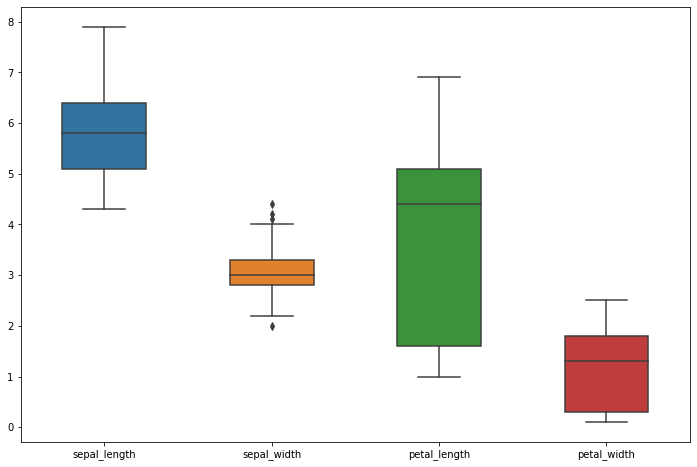

In [9]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = iris_data, width = 0.5, fliersize = 5)
plt.show()

In [10]:
# Checking correlation
corr = iris_data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


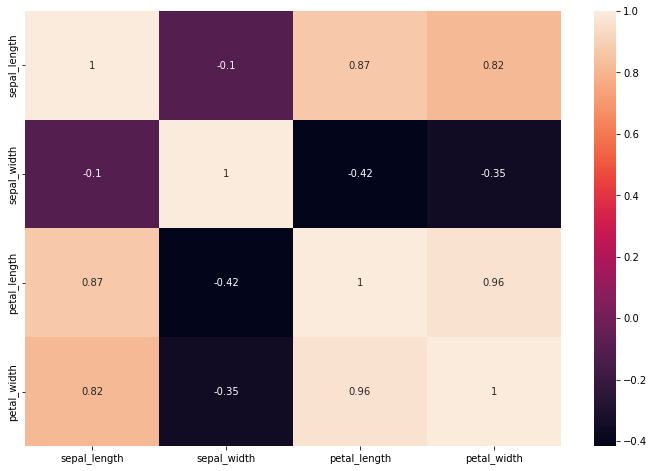

In [11]:
# PLotting it into Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

From the heatmap we can see the correlation between different features that can affect an iris_data listing.

There's correlation among sepal_length to reveiws to petal_width. petal_length and petal_width gives almost the same.

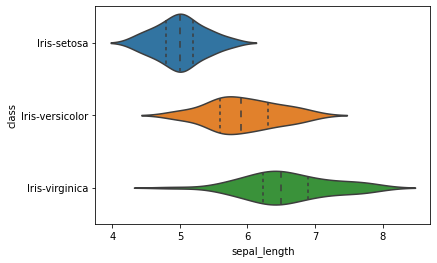

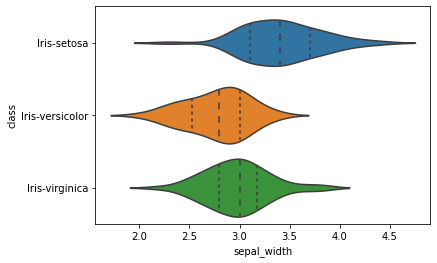

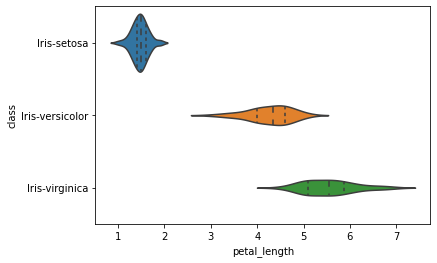

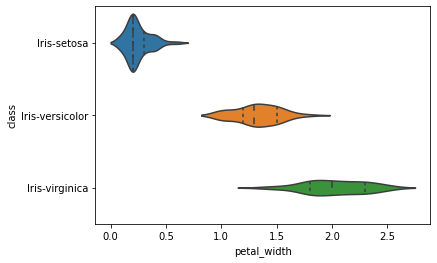

In [12]:
# Violin Plot
sns.violinplot(y='class', x='sepal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iris_data, inner='quartile')
plt.show()

From above violin plot, we can say that Iris-Setosa class is having a smaller petal length and petal width compared to other.

# Building the Model

# Data Splitting

In [13]:
X = iris_data.drop(['class'], axis = 1)
y = iris_data['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = []
model.append(('SVC', SVC(gamma = 'auto')))

In [16]:
model  = SVC(gamma = 'auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

# Making predictions

In [17]:
prediction = model.predict(X_test)

In [18]:
# Printing Accuracy Score and Classification Report for our model
print('Test Accuracy Score is: ', accuracy_score(y_test, prediction))
print('\n')
print('Classification Report: ', classification_report(y_test, prediction))

Test Accuracy Score is:  0.9333333333333333


Classification Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



# Conclusion

# For the model we built, the accuracy score is 0.93 that is our predictions are 93% accurate.

# Thanku!!